
# Gözetimsiz Öğrenme ile Müşteri Segmentasyonu (Customer Segmentation with Unsupervised Learning)
## Unsupervised Learning yöntemleriyle (Kmeans, Hierarchical Clustering )  müşteriler kümelere ayrılıp ve davranışları gözlemlenmek istenmektedir.

###############################################################
#### Veri Seti Hikayesi
###############################################################

 Veri seti son alışverişlerini 2020 - 2021 yıllarında OmniChannel(hem online hem offline) olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

 20.000 gözlem, 12 değişken

* master_id: Eşsiz müşteri numarası
* order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)
* last_order_channel : En son alışverişin yapıldığı kanal
* first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
* last_order_date : Müşterinin yaptığı son alışveriş tarihi
* last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
* last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
* order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
* order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
* customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
* customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
* interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi


##### GÖREVLER

##### GÖREV 1: Veriyi Hazırlama
           * 1. flo_data_20K.csv.csv verisini okuyunuz.
           * 2. Müşterileri segmentlerken kullanacağınız değişkenleri seçiniz. Tenure(Müşterinin yaşı), Recency (en son kaç gün önce alışveriş yaptığı) gibi yeni değişkenler oluşturabilirsiniz.

##### GÖREV 2: K-Means ile Müşteri Segmentasyonu
           * 1. Değişkenleri standartlaştırınız.
           * 2. Optimum küme sayısını belirleyiniz.
           * 3. Modelinizi oluşturunuz ve müşterilerinizi segmentleyiniz.
           * 4. Herbir segmenti istatistiksel olarak inceleyeniz.

##### GÖREV 3: Hierarchical Clustering ile Müşteri Segmentasyonu
           * 1. Görev 2'de standırlaştırdığınız dataframe'i kullanarak optimum küme sayısını belirleyiniz.
           * 2. Modelinizi oluşturunuz ve müşterileriniz segmentleyiniz.
           * 3. Herbir segmenti istatistiksel olarak inceleyeniz.

Objectives:

After some data exploratory analysis, I will deploy three different clustering algorithms and visualize the results:

* Use scikit-learn K-Means clustering and
* Use scikit-learn Hierarchical clustering and create dendograms to visualize the clustering

In [55]:
#define the library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import silhouette_score


In [56]:
# make some settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)

In [57]:
# reading the dataset
flo = pd.read_csv("C:/Users/avcil/projects/project/flo_data.csv")  
# flo is the original dataset

In [58]:
flo.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [59]:
# create a copy of flo data
df = flo.copy()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [61]:
# Converting data containing date information to datetime type
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [62]:
#check chance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [63]:
df["last_order_date"].max() 
# output 2021-05-30 

Timestamp('2021-05-30 00:00:00')

In [64]:
# determined the last_date
last_date = dt.datetime(2021,6,1)

In [65]:
# create a new variable called recency
df["recency"] = (last_date - df["last_order_date"]).astype('timedelta64[D]')
# recency: It keeps information on how many days ago the person last shopped.


In [66]:
# create a new variable called tenure
df["tenure"] = (df["last_order_date"]-df["first_order_date"]).astype('timedelta64[D]')
# tenure : It keeps the difference between the first purchase and the last purchase.

In [67]:
# selected some variables and assigned them to model_df

model_df = df[["order_num_total_ever_online",
               "order_num_total_ever_offline", 
               "customer_value_total_ever_offline",
               "customer_value_total_ever_online",
               "recency",
               "tenure"]]

model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,4.00,1.00,139.99,799.38,95.00,119.00
1,19.00,2.00,159.97,1853.58,105.00,1469.00
2,3.00,2.00,189.97,395.35,186.00,366.00
3,1.00,1.00,39.99,81.98,135.00,11.00
4,1.00,1.00,49.99,159.99,86.00,582.00


In [68]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_num_total_ever_online        19945 non-null  float64
 1   order_num_total_ever_offline       19945 non-null  float64
 2   customer_value_total_ever_offline  19945 non-null  float64
 3   customer_value_total_ever_online   19945 non-null  float64
 4   recency                            19945 non-null  float64
 5   tenure                             19945 non-null  float64
dtypes: float64(6)
memory usage: 935.0 KB


In [69]:
model_df.isnull().sum()

order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
recency                              0
tenure                               0
dtype: int64

In [70]:
model_df.duplicated().sum()

0

In [71]:
model_df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13
recency,19945.00,134.46,103.28,2.00,43.00,111.00,202.00,367.00
tenure,19945.00,666.84,522.13,0.00,353.00,536.00,766.00,3034.00


In [72]:
# check the skewness

def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

c:\Users\avcil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


order_num_total_ever_online's: Skew: 10.487693811914617, : SkewtestResult(statistic=152.9996121784795, pvalue=0.0)


c:\Users\avcil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


order_num_total_ever_offline's: Skew: 20.328068075845888, : SkewtestResult(statistic=184.13121810134328, pvalue=0.0)


c:\Users\avcil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


customer_value_total_ever_offline's: Skew: 16.29952194789334, : SkewtestResult(statistic=173.73456097827923, pvalue=0.0)


c:\Users\avcil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


customer_value_total_ever_online's: Skew: 20.08427979804232, : SkewtestResult(statistic=183.56317267711924, pvalue=0.0)


c:\Users\avcil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


recency's: Skew: 0.6172488156761073, : SkewtestResult(statistic=32.86977170491703, pvalue=5.944419293752164e-237)


c:\Users\avcil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


tenure's: Skew: 1.756242119042335, : SkewtestResult(statistic=71.08790370222574, pvalue=0.0)


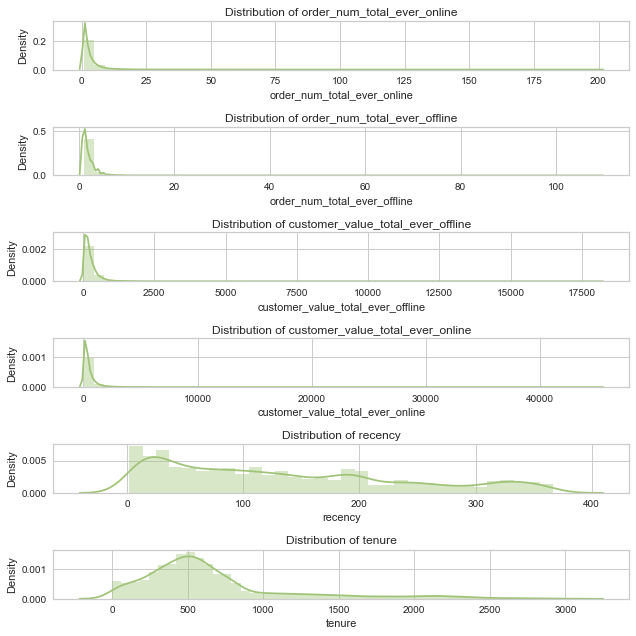

In [73]:
# draw all variables to check&see skewness
plt.figure(figsize=(9, 9))

plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')

plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')

plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')

plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')

plt.subplot(6, 1, 5)
check_skew(model_df,'recency')

plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')

plt.tight_layout()
# plt.savefig('before_transform.png', format='png', dpi=1000)   #if you want to save the output image
plt.show()

Verinin dağılımı: Verinin normal dağılıp dağılmaması, bazı algoritmaların çalışmasını etkileyen bir faktör. Veriler sağa yatık, ya da sola yatıksa, model performansı bu durumdan etkilenebilir.

Özellikler arasındaki ölçek farklılıkları: Klasik bir örnekten gidecek olursak, verimiz yaş ve gelir boyutlarını içeriyor olsun. Yaş aralığı 0-90 yaşlarını kapsıyor ve gelir boyutu da 0- 250.000 TL arasında değerler içeriyor olsun. Burada Öklid, Manhattan gibi uzaklık bazlı hesaplamaları kullanan algoritmalar için değerler sapacaktır. Bu bağlamda bu özellliklerin ortak bir veri aralığına çekilmesi ile daha doğru sonuçlar elde edebiliriz.

Bu değerleri normal hale getirmek ve baskınlığı azaltmak adına bazı yöntemler mevcuttur. Bunlar, normalizasyon, standardizasyon gibi metodlardır. Bu metodlar uzaklık tabanlı ve gradyan tabanlı tahminleyici algoritmaları kullanmadan önce uygulanması faydalı olan yöntemlerdir. Peki bu metodlar nedir ve hangi durumlarda kullanılır?

MinMax Scaling, verinin 0 ile 1 arasında değerler aldığı bir durumdur. Burada dağılım, verinin dağılımı ile benzerdir. Burada ‘outlier’ denilen dışta kalan verilere karşı hassasiyet durumu vardır, bu yüzden bu değerlerin fazla olduğu bir durumda iyi bir performans gösteremeyebilir.

url = https://www.veribilimiokulu.com/veri-hazirliginin-vazgecilmezi-ozellik-olceklendirme/

In [74]:
# applying Log transformation to ensure normal distribution
model_df['order_num_total_ever_online'] = np.log1p(model_df['order_num_total_ever_online'])
model_df['order_num_total_ever_offline'] = np.log1p(model_df['order_num_total_ever_offline'])
model_df['customer_value_total_ever_offline'] = np.log1p(model_df['customer_value_total_ever_offline'])
model_df['customer_value_total_ever_online'] = np.log1p(model_df['customer_value_total_ever_online'])
model_df['recency'] = np.log1p(model_df['recency'])
model_df['tenure'] = np.log1p(model_df['tenure'])


C:\Users\avcil\AppData\Local\Temp\ipykernel_4132\2067557519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_online'] = np.log1p(model_df['order_num_total_ever_online'])
C:\Users\avcil\AppData\Local\Temp\ipykernel_4132\2067557519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_offline'] = np.log1p(model_df['order_num_total_ever_offline'])
C:\Users\avcil\AppData\Local\Temp\ipykernel_4132\2067557519.py:4: SettingWithCopyWarning: 
A value is 

Logaritmik dönüşüm, veri dağılımını düzleştirebilir ve aşırı büyük veya küçük değerlere olan hassasiyeti azaltabilir. Özellikle, bir özellik normal dağılıma daha yakın bir dağılıma sahip olursa, bazı makine öğrenimi modelleri için daha iyi performans gösterebilir. Bu tür dönüşümler, özellikle regresyon modelleri gibi bazı modellerde yaygın olarak kullanılır.

In [75]:
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,1.61,0.69,4.95,6.69,4.56,4.79
1,3.00,1.10,5.08,7.53,4.66,7.29
2,1.39,1.10,5.25,5.98,5.23,5.91
3,0.69,0.69,3.71,4.42,4.91,2.48
4,0.69,0.69,3.93,5.08,4.47,6.37


In [76]:
# Scaling     
# NORMALIZATION 
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.20,0.00,0.34,0.50,0.72,0.60
1,0.50,0.10,0.36,0.60,0.74,0.91
2,0.15,0.10,0.39,0.41,0.86,0.74
3,0.00,0.00,0.18,0.22,0.79,0.31
4,0.00,0.00,0.21,0.30,0.70,0.79


Bu kod bloğu, veri çerçevesindeki değerleri belirli bir aralığa ölçeklendirmek için Min-Max ölçekleme işlemi uygulamaktadır. Min-Max ölçekleme, verileri belirli bir aralığa (genellikle 0 ile 1 arasına) dönüştürmek için kullanılır. Bu işlem, modelin daha iyi performans göstermesine yardımcı olabilir, çünkü ölçeklenmiş veriler genellikle daha istikrarlı ve daha hızlı bir şekilde öğrenilen modellere sahiptir. İşte bu kodun yaptığı adımlar:

MinMaxScaler sınıfı, verileri belirli bir aralığa dönüştüren bir ölçekleme nesnesi oluşturur. Bu durumda, aralık (0, 1) olarak belirlenmiştir, yani tüm değerler 0 ile 1 arasında olacak şekilde ölçeklendirilecektir.

Bu ölçekleme işlemi, genellikle özelliklerin birbirine göre daha tutarlı bir şekilde etkileşimde bulunmasını sağlar, bu da öğrenme algoritmalarının daha iyi performans göstermesine yardımcı olabilir.

# K-MEANS MODEL

In order to find an appropriate number of clusters, the elbow method or the silhuette score could be be used. I will show both methods and I will choose the inertia for a number of clusters between 2 and 10 for this project. Generally, the rule is to choose the number of clusters where we see a kink or "an elbow" in the graph or the higher silhuette score:

In [ ]:
# Kmeans modelinde kullanmak için datasetimi kopyalıyorum, orjinal hali bozulmasın diye
k_means_model_df = model_df.copy()

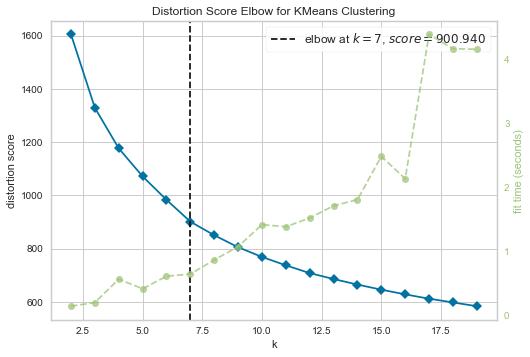

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
# Determine the optimal number of segments
# Let's see the distribution and decide the optimal number of segments with KElbowVisualizer
  
kmeans = KMeans()
elbows = KElbowVisualizer(kmeans, k=(2, 20))

elbows.fit(k_means_model_df)
elbows.show()

We can see there, k=7. it means, optimal number of cluster is 7.

We build our k_mean model with cluster=7

In [78]:
# Create model 

k_means = KMeans(n_clusters = 7, random_state= 42)
k_means.fit(k_means_model_df)

segments = k_means.labels_
segments
# toplam 7 tane segment/grup oluşturdu 0,1,2,3,4,5 ve 6 isimlerinde

array([6, 6, 6, ..., 1, 2, 0])

In [91]:
# appending labels to data points
k_means_model_df["segment"] = segments
k_means_model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,0.20,0.00,0.34,0.50,0.72,0.60,6
1,0.50,0.10,0.36,0.60,0.74,0.91,6
2,0.15,0.10,0.39,0.41,0.86,0.74,6
3,0.00,0.00,0.18,0.22,0.79,0.31,3
4,0.00,0.00,0.21,0.30,0.70,0.79,4


In [97]:
# Size of the clusters
size = k_means_model_df.groupby('segment').size().to_frame()
size.columns = ["KM_size"]
size

,KM_size
segment,
0,5448
1,1841
2,3269
3,828
4,3340
5,1974
6,3245


## Visualization of Clusters:

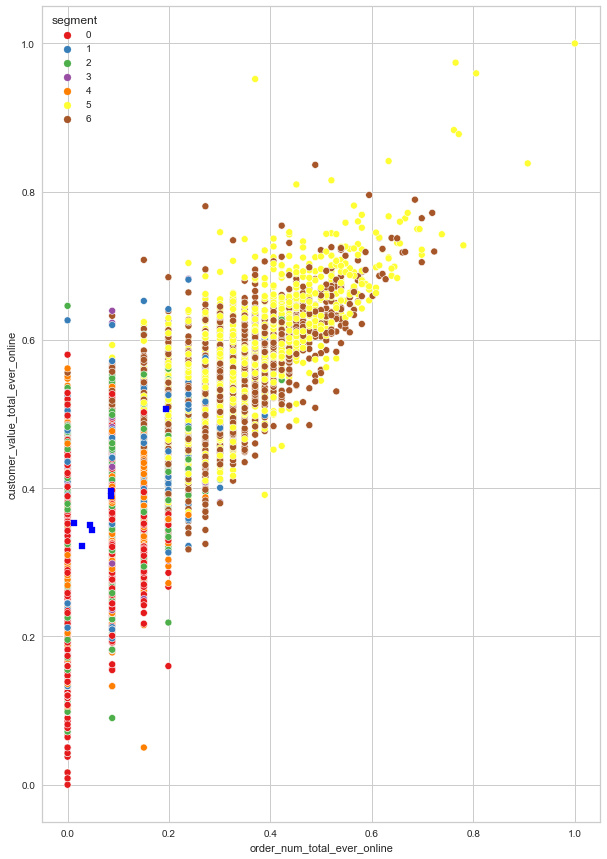

In [95]:
# online alışveriş ve online alışveriş tutarı 

 
fig1, ax = plt.subplots(figsize=(10, 15))

scat_2 = sns.scatterplot(x='order_num_total_ever_online' , y= 'customer_value_total_ever_online', 
                         data= k_means_model_df, hue='segment', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

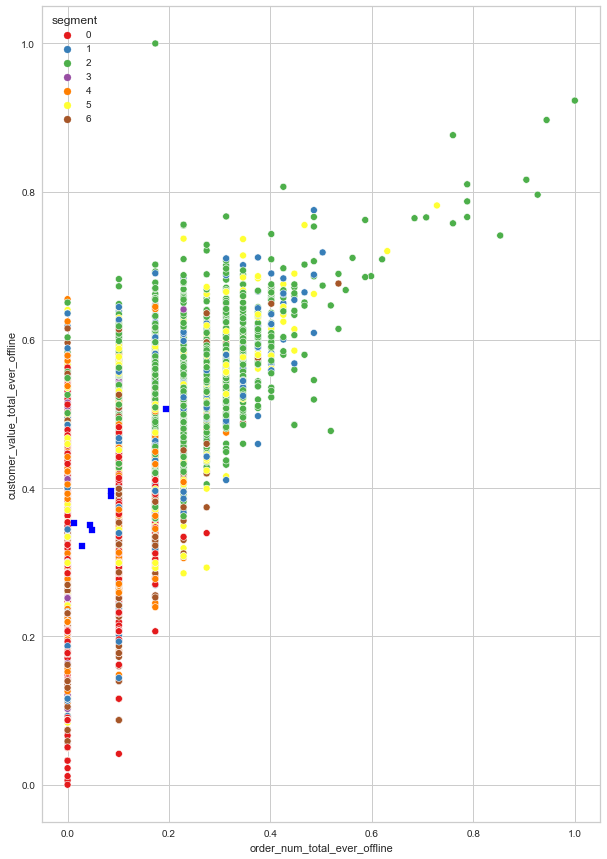

In [96]:
# offline alışveriş ve offline alışveriş tutarı 

 
fig1, ax = plt.subplots(figsize=(10, 15))

scat_2 = sns.scatterplot(x='order_num_total_ever_offline' , y= 'customer_value_total_ever_offline', 
                         data= k_means_model_df, hue='segment', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

#  Segmentlerin ham veri ile birleştirilmiş hali

In [79]:
# Segmentlerin ham veri ile birleştirilmiş hali
# We assign the results we find to a new variable named final_df and keep them there

final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline",
               "customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]

# appending labels to data points
final_df["segment"] = segments
final_df.head()

# this is the final version of the model made with KMeans

C:\Users\avcil\AppData\Local\Temp\ipykernel_4132\3017043498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["segment"] = segments


,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.00,1.00,139.99,799.38,95.00,119.00,6
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.00,2.00,159.97,1853.58,105.00,1469.00,6
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.00,2.00,189.97,395.35,186.00,366.00,6
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.00,1.00,39.99,81.98,135.00,11.00,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.00,1.00,49.99,159.99,86.00,582.00,4


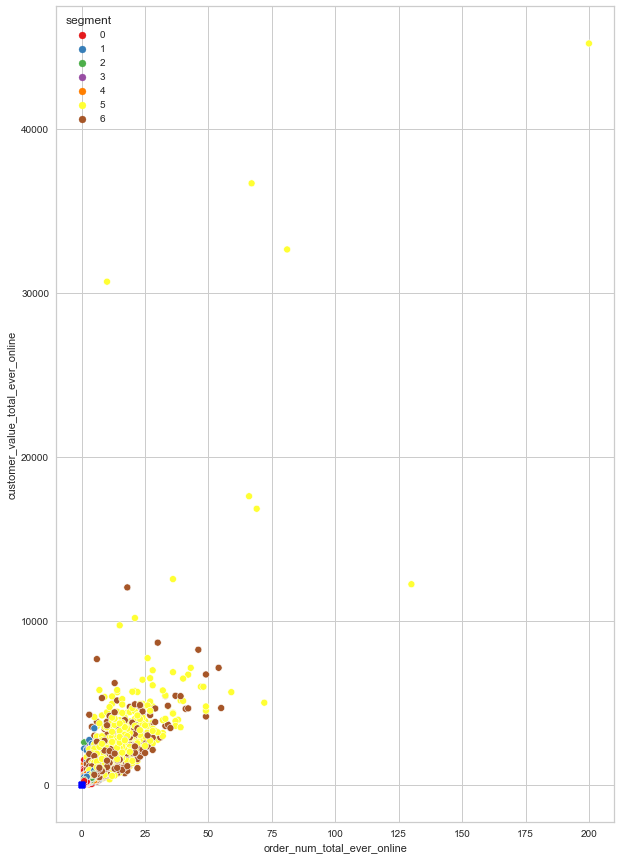

In [94]:
# Segmenti belirlenmiş Ham veri ile online alışveriş ve online alışveriş tutarı 
# Bunu ham veri ile yapmamak lazım 
 
fig1, ax = plt.subplots(figsize=(18, 15))

scat_2 = sns.scatterplot(x='order_num_total_ever_online' , y= 'customer_value_total_ever_online', 
                         data= final_df, hue='segment', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

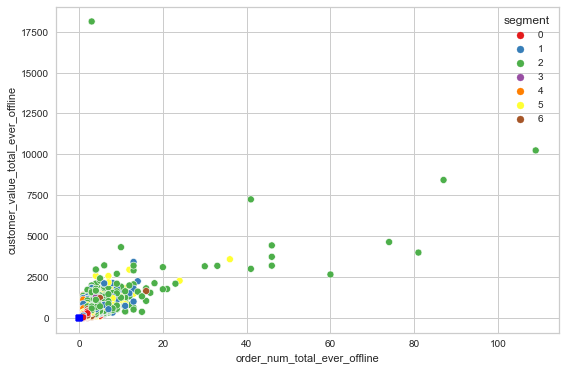

In [93]:
# Segmenti belirlenmiş Ham veri ile offline alışveriş ve offline alışveriş tutarı 
# Bunu ham veri ile yapmamak lazım 
 
fig1, ax = plt.subplots(figsize=(15, 10))

scat_2 = sns.scatterplot(x='order_num_total_ever_offline' , y= 'customer_value_total_ever_offline', 
                         data= final_df, hue='segment', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

# Normalize edilmiş Online ve offline verilerin birleştirilmiş hali

In [85]:
# Normalize edilmiş Online ve offline verilerin birleştirilmiş hali

# Normalizasyonlu hali ile online+offline toplam alışveriş verileri ve online+offline toplam tutarların hangi segmentlerde olduğunu verir
# İki sütundaki verileri toplayarak yeni bir DataFrame oluşturalım

final_total = pd.DataFrame({
        'Total_order': model_df['order_num_total_ever_online'] + model_df['order_num_total_ever_offline'],
        'Total_customer_value': model_df['customer_value_total_ever_online'] + model_df['customer_value_total_ever_offline']})


# appending labels to data points
final_total["segment"] = segments
final_total.head(5)

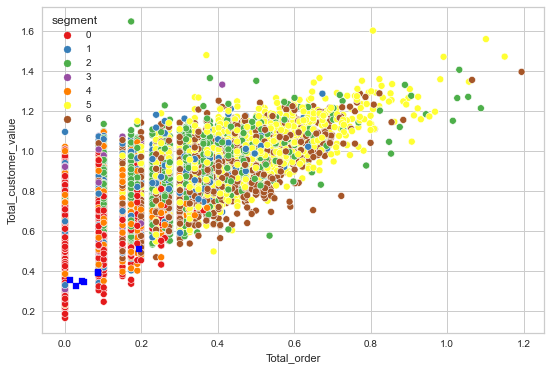

In [87]:
# Normalizasyonlu hali ile online+offline toplam alışveriş verileri ve online+offline toplam tutarların hangi segmentlerde olduğunu verir
# Toplam alışveriş vs toplam tutar görselleştirmesi

fig1, ax = plt.subplots(figsize=(15, 10))

scat_1 = sns.scatterplot(x='Total_order' , y= 'Total_customer_value', 
                         data= final_total, hue='segment', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

# Ham veri ile Online ve offline verilerin birleştirilmiş hali

In [80]:
# Segmentleri belirlenmiş verilerin ham hali ile görselleştirme 
# İki sütundaki verileri toplayarak yeni bir DataFrame oluşturalım

final_2 = pd.DataFrame({
        'Total_order': final_df['order_num_total_ever_online'] + final_df['order_num_total_ever_offline'],
        'Total_customer_value': final_df['customer_value_total_ever_online'] + final_df['customer_value_total_ever_offline'],
        'Segments': final_df["segment"] })

final_2.head()

,Total_order,Total_customer_value,Segments
0,5.00,939.37,6
1,21.00,2013.55,6
2,5.00,585.32,6
3,2.00,121.97,3
4,2.00,209.98,4


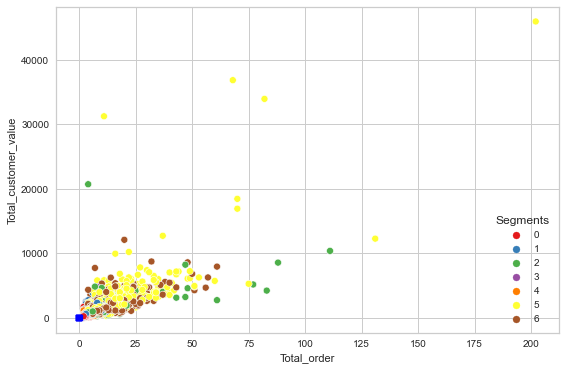

In [81]:
# Segmentleri belirlenmiş ham veri ile Toplam Online + offline verileri
# Görselleştirmesi 

fig1, ax = plt.subplots(figsize=(15, 10))

scat_3 = sns.scatterplot(x='Total_order' , y= 'Total_customer_value', 
                         data= final_2, hue='Segments', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

# Model Statistic

In [21]:
# Let's examine each segment statistically
final_df.groupby("segment").agg({"order_num_total_ever_online":["min","mean","max"],
                                  "order_num_total_ever_offline":["min","mean","max"],
                                  "customer_value_total_ever_offline":["min","mean","max"],
                                  "customer_value_total_ever_online":["min","mean","max"],
                                  "recency":["min","mean","max"],
                                  "tenure":["min","mean","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                 customer_value_total_ever_online                  recency               tenure                     
                                min mean    max                          min mean    max                               min   mean      max                              min    mean      max     min   mean    max    min   mean     max count
segment                                                                                                                                                                                                                                       
0                              1.00 1.42   5.00                         1.00 1.28   5.00                             10.00 145.16   829.98                            12.99  210.07  1519.17   88.00 225.71 367.00  52.00 489.85 2820.00  5448
1                              1.00 2.20  12.00                         1.00 2.10  14.00                             12.99 293.82  3425.14                            23.99  377.70  3444.08    2.00  10.00  27.00   2.00 665.01 3031.00  1841
2                              1.00 1.84  13.00                         1.00 3.77 109.00                            106.82 551.78 18119.14                            14.99  283.36  2587.20   22.00 153.29 366.00  20.00 729.95 2911.00  3269
3                              1.00 1.40   8.00                         1.00 1.13   6.00                             12.99 192.39  1333.00                            19.99  250.37  3476.81    4.00 139.55 367.00   0.00  37.24  132.00   828
4                              1.00 1.61   6.00                         1.00 1.48   6.00                             12.99 185.84  1406.85                            14.00  250.00  1307.33   15.00  50.33 109.00  43.00 604.52 2828.00  3340
5                              2.00 8.63 200.00                         1.00 2.10  36.00                             12.99 278.89  3589.65                           265.97 1475.52 45220.13    2.00  32.72 109.00  18.00 966.63 3034.00  1974
6                              1.00 6.37  55.00                         1.00 1.54  16.00                             10.49 184.41  1644.79                           180.96  985.51 12038.18   55.00 180.09 367.00  26.00 943.90 2964.00  3245

# Hierarchical Clustering Model

In [99]:
# Hierarchical Clustering modelinde kullanmak için datasetimi kopyalıyorum, orjinal hali bozulmasın diye
hc_model_df = model_df.copy()

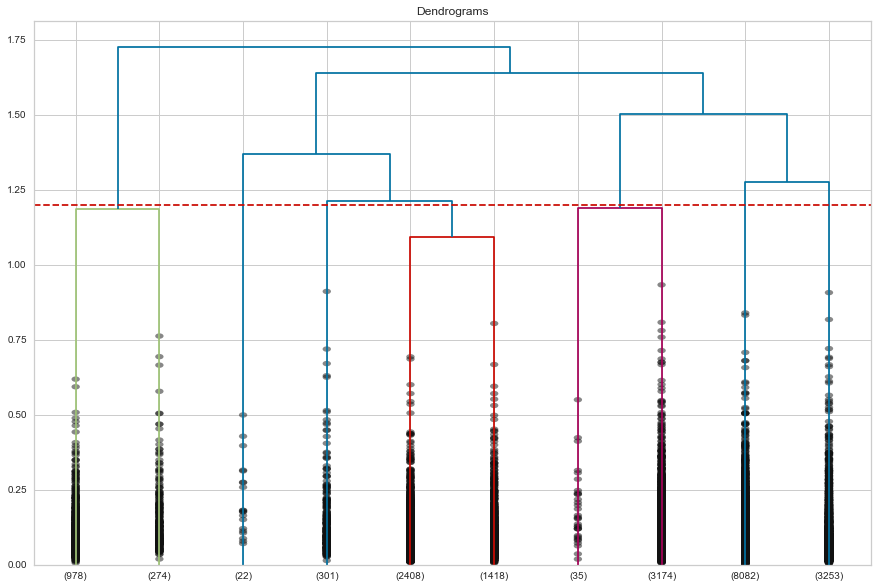

In [100]:
# We determine the optimum number of clusters for hierarchical clustering 
# we will use the data frame we have standardized
# The best way to determine the number of clusters in hierarchical clustering is to draw a dendrogram

hc_complete = linkage(hc_model_df, 'complete')

plt.figure(figsize=(15, 10))
plt.title("Dendrograms")
dend = dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.show()

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
Average linkage minimizes the average of the distances between all observations of pairs of clusters.

# Dikkat cluster sayısını hesapla tekrar 

In [101]:
# Create our model
# Segment our customer

hc = AgglomerativeClustering(n_clusters=5)

segments = hc.fit_predict(hc_model_df)

final_hc_df = df[["master_id","order_num_total_ever_online",
               "order_num_total_ever_offline",
               "customer_value_total_ever_offline",
               "customer_value_total_ever_online",
               "recency",
               "tenure"]]


final_hc_df["segment"] = segments
final_hc_df.head()
# this is the final version of the model made with Hierarchical Clustering

C:\Users\avcil\AppData\Local\Temp\ipykernel_4132\2399624760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_hc_df["segment"] = segments


,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.00,1.00,139.99,799.38,95.00,119.00,3
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.00,2.00,159.97,1853.58,105.00,1469.00,2
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.00,2.00,189.97,395.35,186.00,366.00,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.00,1.00,39.99,81.98,135.00,11.00,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.00,1.00,49.99,159.99,86.00,582.00,0


In [102]:
# Size of the clusters
hc_size = final_hc_df.groupby('segment').size().to_frame()
hc_size.columns = ["KM_size"]
hc_size

,KM_size
segment,
0,8747
1,4994
2,2396
3,985
4,2823


# Model Statistic

In [103]:
# Let's examine each segment statistically

final_hc_df.groupby("segment").agg({"order_num_total_ever_online":["min","mean","max"],
                                  "order_num_total_ever_offline":["min","mean","max"],
                                  "customer_value_total_ever_offline":["min","mean","max"],
                                  "customer_value_total_ever_online":["min","mean","max"],
                                  "recency":["min","mean","max"],
                                  "tenure":["min","mean","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                 customer_value_total_ever_online                  recency               tenure                     
                                min mean    max                          min mean    max                               min   mean      max                              min    mean      max     min   mean    max    min   mean     max count
segment                                                                                                                                                                                                                                       
0                              1.00 1.37  13.00                         1.00 1.99 109.00                             10.49 261.97 18119.14                            12.99  208.07 30688.47   18.00 183.03 367.00   3.00 569.72 2911.00  8747
1                              1.00 3.75  49.00                         1.00 1.82  24.00                             12.99 240.98  3425.14                            19.99  638.61 12545.37    2.00  23.96 108.00  18.00 715.07 3034.00  4994
2                              1.00 6.91 200.00                         1.00 3.08  16.00                             12.99 427.12  2963.24                           139.98 1104.12 45220.13   14.00 131.57 365.00 109.00 914.49 3016.00  2396
3                              1.00 1.40   6.00                         1.00 1.20   6.00                             12.99 200.69  1019.97                            26.99  227.42  1389.60    4.00  92.52 367.00   0.00  80.26  555.00   985
4                              1.00 4.74  24.00                         1.00 1.12   4.00                             10.00 123.46  1049.92                            59.98  722.77  7665.28   36.00 196.52 367.00  71.00 876.95 2964.00  2823